In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

## Problem 1: Clustering
## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months.You are given the task to identify the segments based on credit card usage.



### 1.1 Read the data and do exploratory data analysis. Describe the data briefly

In [2]:
bank = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank.shape

(210, 7)

In [6]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


### Univariate Analysis

In [8]:
print('Range of values: ', bank['spending'].max()-bank['spending'].min())

Range of values:  10.59


In [9]:
print('Minimum spending: ', bank['spending'].min())
print('Maximum spending: ',bank['spending'].max())
print('Mean value: ', bank['spending'].mean())
print('Median value: ',bank['spending'].median())
print('Standard deviation: ', bank['spending'].std())
print('Null values: ',bank['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [10]:
Q1=bank['spending'].quantile(q=0.25)
Q3=bank['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(bank['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


In [11]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [12]:
print('Number of outliers in spending upper : ', bank[bank['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', bank[bank['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(bank[bank['spending']>24.8575]['spending'].count()*100/len(bank)), '%')
print('% of Outlier in spending lower: ',round(bank[bank['spending']<4.717499]['spending'].count()*100/len(bank)), '%')



Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


Text(0.5, 0, 'spending')

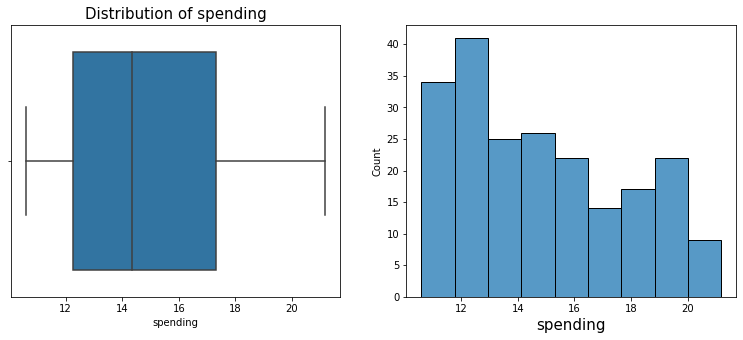

In [13]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='spending',data=bank,ax=ax1)
ax1.set_title('Distribution of spending', fontsize=15)

sns.histplot(bank['spending'])
ax2.set_xlabel('spending', fontsize=15)


In [14]:
print('Range of values: ',bank['advance_payments'].max()-bank['advance_payments'].min())

Range of values:  4.84


In [15]:
print('Minimum advance_payments: ', bank['advance_payments'].min())
print('Maximum advance_payments: ',bank['advance_payments'].max())
print('Mean value: ', bank['advance_payments'].mean())
print('Median value: ',bank['advance_payments'].median())
print('Standard deviation: ', bank['advance_payments'].std())
print('Null values: ',bank['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [16]:
Q1=bank['advance_payments'].quantile(q=0.25)
Q3=bank['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(bank['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


In [17]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [18]:
print('Number of outliers in advance_payments upper : ', bank[bank['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', bank[bank['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ',round(bank[bank['advance_payments']>19.1125]['advance_payments'].count()*100/len(bank)), '%')
print('% of Outlier in advance_payments lower: ',round(bank[bank['advance_payments']<10.052499]['advance_payments'].count()*100/len(bank)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %


Text(0.5, 0, 'advance_payments')

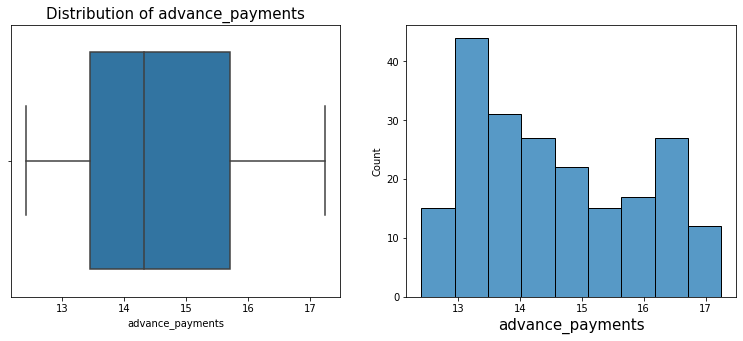

In [19]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))


sns.boxplot(x='advance_payments',data=bank,ax=ax1)
ax1.set_title('Distribution of advance_payments', fontsize=15)


sns.histplot(bank['advance_payments'])
ax2.set_xlabel('advance_payments', fontsize=15)


In [20]:
print('Range of values: ', bank['probability_of_full_payment'].max()-bank['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [21]:
print('Minimum probability_of_full_payment ', bank['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',bank['probability_of_full_payment'].max())
print('Mean value: ', bank['probability_of_full_payment'].mean())
print('Median value: ',bank['probability_of_full_payment'].median())
print('Standard deviation: ', bank['probability_of_full_payment'].std())
print('Null values: ',bank['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [22]:
Q1=bank['probability_of_full_payment'].quantile(q=0.25)
Q3=bank['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(bank['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [23]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [24]:
print('Number of outliers in probability_of_full_payment upper : ', bank[bank['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', bank[bank['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(bank[bank['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(bank)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(bank[bank['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(bank)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


Text(0.5, 0, 'probability_of_full_payment')

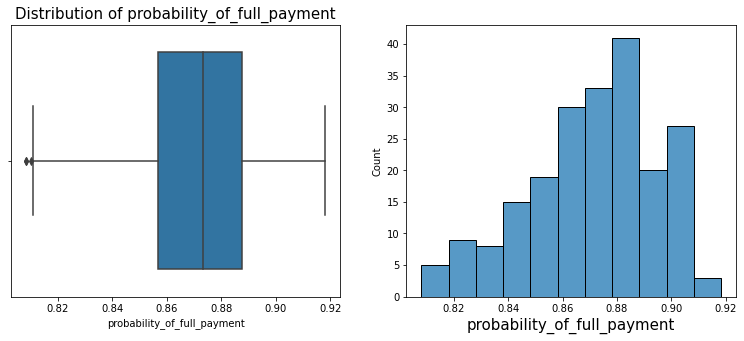

In [25]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='probability_of_full_payment',data=bank,ax=ax1)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)

sns.histplot(bank['probability_of_full_payment'])
ax2.set_xlabel('probability_of_full_payment', fontsize=15)

In [26]:
print('Range of values: ', bank['current_balance'].max()-bank['current_balance'].min())

Range of values:  1.7759999999999998


In [27]:
print('Minimum current_balance: ', bank['current_balance'].min())
print('Maximum current_balance: ',bank['current_balance'].max())
print('Mean value: ', bank['current_balance'].mean())
print('Median value: ',bank['current_balance'].median())
print('Standard deviation: ', bank['current_balance'].std())
print('Null values: ',bank['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [28]:
Q1=bank['current_balance'].quantile(q=0.25)
Q3=bank['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(bank['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


In [29]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [30]:
print('Number of outliers in current_balance upper : ', bank[bank['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', bank[bank['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper: ',round(bank[bank['current_balance']>7.056000000000001]['current_balance'].count()*100/len(bank)), '%')
print('% of Outlier in current_balance lower: ',round(bank[bank['current_balance']<4.186]['current_balance'].count()*100/len(bank)), '%')

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper:  0 %
% of Outlier in current_balance lower:  0 %


Text(0.5, 0, 'current_balance')

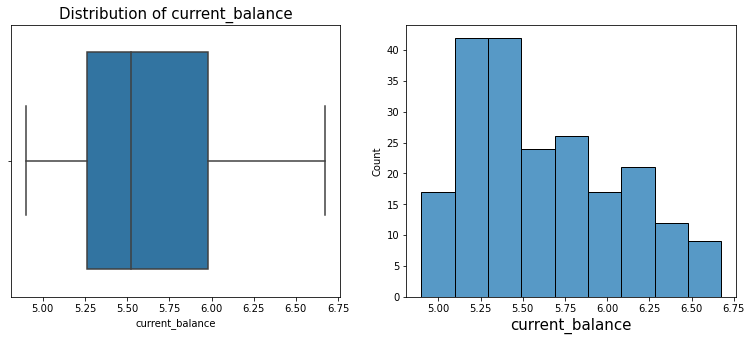

In [31]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='current_balance',data=bank,ax=ax1)
ax1.set_title('Distribution of current_balance', fontsize=15)


sns.histplot(bank['current_balance'])
ax2.set_xlabel('current_balance', fontsize=15)

In [32]:
print('Range of values: ', bank['credit_limit'].max()-bank['credit_limit'].min())

Range of values:  1.4030000000000005


In [33]:
print('Minimum credit_limit: ', bank['credit_limit'].min())
print('Maximum credit_limit: ',bank['credit_limit'].max())
print('Mean value: ', bank['credit_limit'].mean())
print('Median value: ',bank['credit_limit'].median())
print('Standard deviation: ', bank['credit_limit'].std())
print('Null values: ',bank['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [34]:
Q1=bank['credit_limit'].quantile(q=0.25)
Q3=bank['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(bank['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [35]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [36]:
print('Number of outliers in credit_limit upper : ', bank[bank['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', bank[bank['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(bank[bank['credit_limit']>4.488375]['credit_limit'].count()*100/len(bank)), '%')
print('% of Outlier in credit_limit lower: ',round(bank[bank['credit_limit']<2.017375]['credit_limit'].count()*100/len(bank)), '%')

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0 %
% of Outlier in credit_limit lower:  0 %


Text(0.5, 0, 'credit_limit')

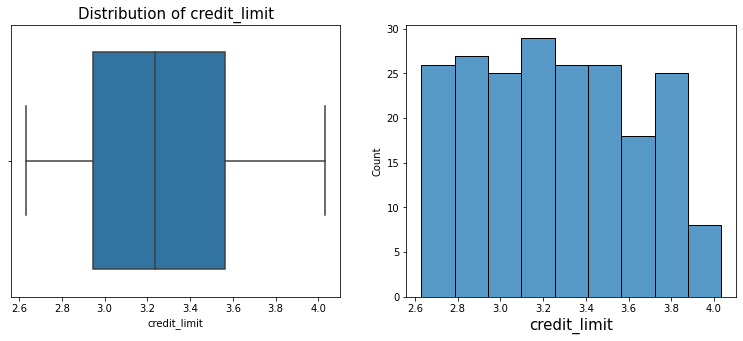

In [37]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='credit_limit',data=bank,ax=ax1)
ax1.set_title('Distribution of credit_limit', fontsize=15)


sns.histplot(bank['credit_limit'])
ax2.set_xlabel('credit_limit', fontsize=15)


In [38]:
print('Range of values: ', bank['min_payment_amt'].max()-bank['min_payment_amt'].min())

Range of values:  7.690899999999999


In [39]:
print('Minimum min_payment_amt: ', bank['min_payment_amt'].min())
print('Maximum min_payment_amt: ',bank['min_payment_amt'].max())
print('Mean value: ', bank['min_payment_amt'].mean())
print('Median value: ',bank['min_payment_amt'].median())
print('Standard deviation: ', bank['min_payment_amt'].std())
print('Null values: ',bank['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [40]:
Q1=bank['min_payment_amt'].quantile(q=0.25)
Q3=bank['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(bank['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


In [41]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [42]:
print('Number of outliers in min_payment_amt upper : ', bank[bank['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', bank[bank['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper: ',round(bank[bank['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(bank)), '%')
print('% of Outlier in min_payment_amt lower: ',round(bank[bank['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(bank)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1 %
% of Outlier in min_payment_amt lower:  0 %


Text(0.5, 0, 'min_payment_amt')

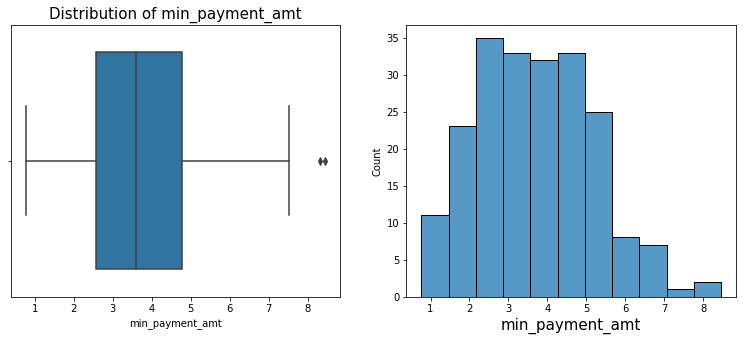

In [43]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='min_payment_amt',data=bank,ax=ax1)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)

sns.histplot(bank['min_payment_amt'])
ax2.set_xlabel('min_payment_amt', fontsize=15)


In [44]:
print('Range of values: ', bank['max_spent_in_single_shopping'].max()-bank['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [45]:
print('Minimum max_spent_in_single_shopping: ', bank['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',bank['max_spent_in_single_shopping'].max())
print('Mean value: ', bank['max_spent_in_single_shopping'].mean())
print('Median value: ',bank['max_spent_in_single_shopping'].median())
print('Standard deviation: ', bank['max_spent_in_single_shopping'].std())
print('Null values: ',bank['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [46]:
Q1=bank['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=bank['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(bank['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


In [47]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [48]:
print('Number of outliers in max_spent_in_single_shopping upper : ', bank[bank['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', bank[bank['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper: ',round(bank[bank['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(bank)), '%')
print('% of Outlier in max_spent_in_single_shopping lower: ',round(bank[bank['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(bank)), '%')

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper:  0 %
% of Outlier in max_spent_in_single_shopping lower:  0 %


Text(0.5, 0, 'max_spent_in_single_shopping')

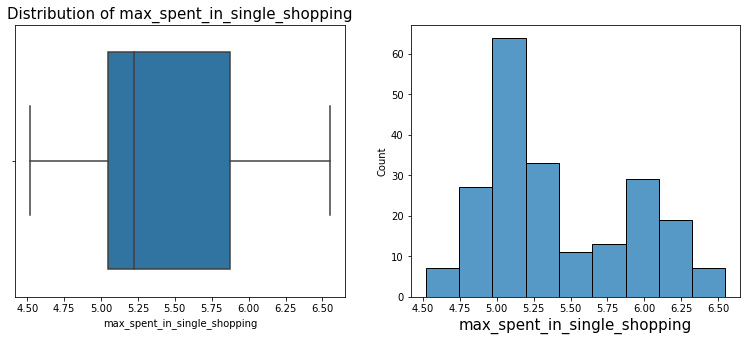

In [49]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='max_spent_in_single_shopping',data=bank,ax=ax1)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)

sns.histplot(bank['max_spent_in_single_shopping'])
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)


### Multivariate Analysis

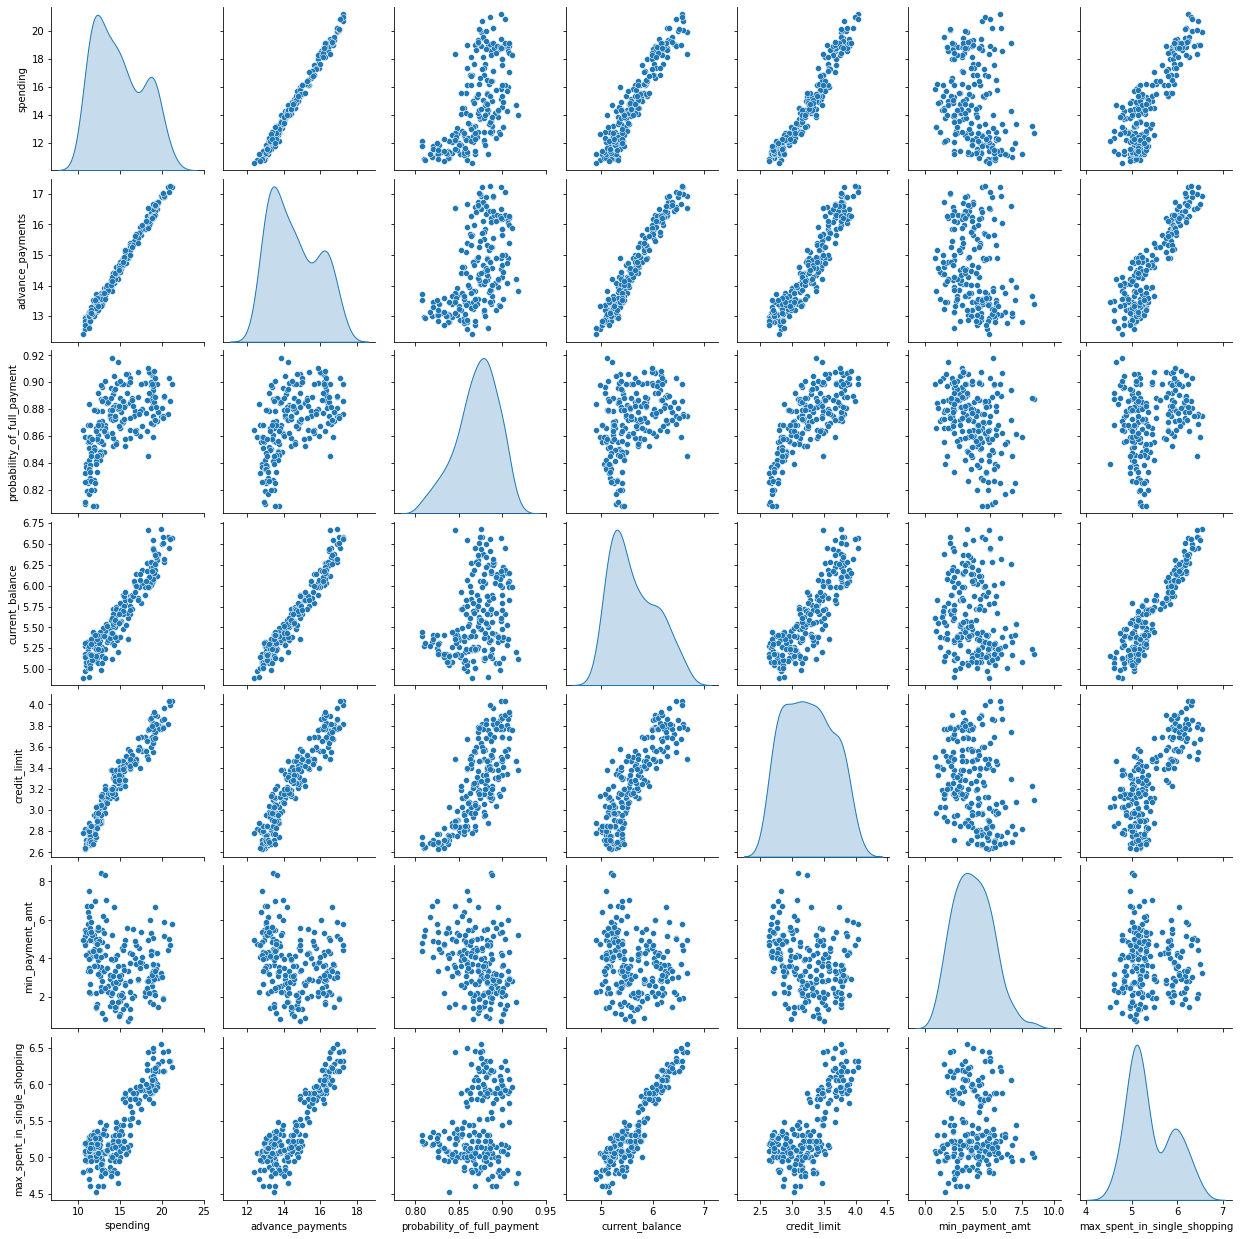

In [50]:
sns.pairplot(bank,diag_kind='kde')

In [209]:
bank.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.577823
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.609956
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,0.026489
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.663045
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.458060
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,-0.221285
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,-0.790389
cluster,-0.577823,-0.609956,0.026489,-0.663045,-0.458060,-0.221285,-0.790389,1.000000


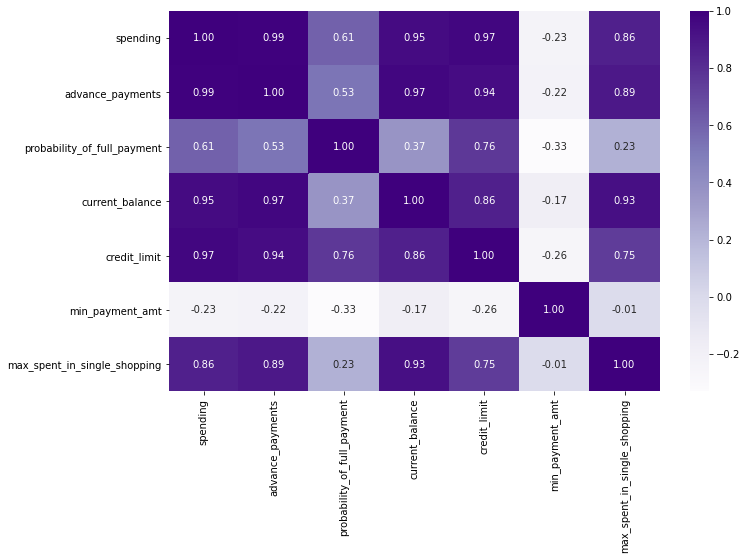

In [52]:
plt.figure(figsize=(11,7))
sns.heatmap(bank.corr(), annot=True,fmt='.2f', cmap='Purples')
plt.show()

In [53]:
bank1=bank.copy()

In [54]:
def check_outliers(bankdata):
    bankdata_num = bankdata.loc[:,bankdata.columns != 'class']
    Q1 = bankdata_num.quantile(0.25)
    Q3 = bankdata.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    bankdata_num_mod = ((bankdata_num < (Q1 - 1.5 * IQR)) |(bankdata_num > (Q3 + 1.5 * IQR)))
    for col in bankdata_num_mod:
        if(1 in bankdata_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, bankdata_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(bank1)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


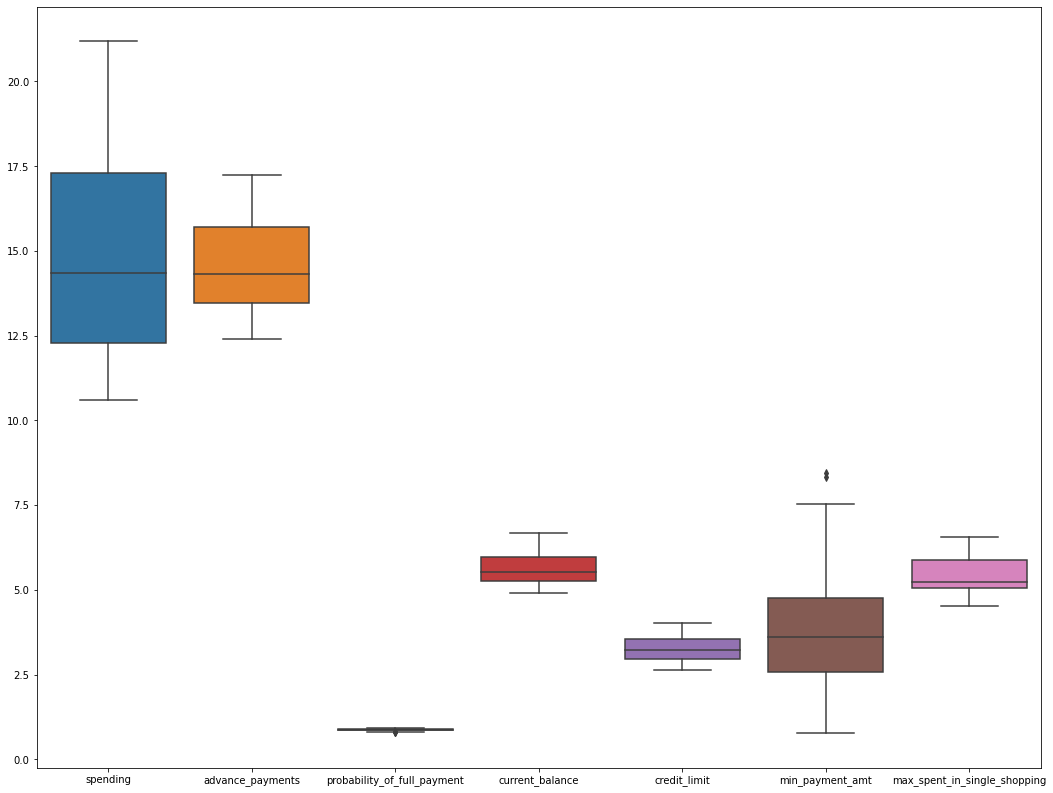

In [55]:
plt.figure(figsize=(18,14))
box = sns.boxplot(data=bank1)


## 1.2 Do you think scaling is necessary for clustering in this case? Justify

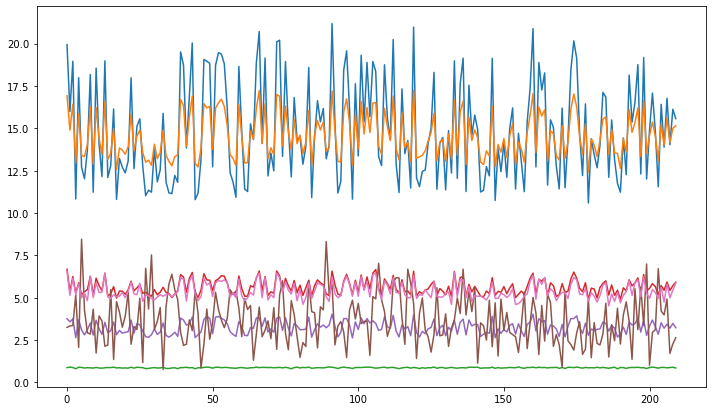

In [56]:
plt.figure(figsize=(12,7))
plt.plot(bank1)
plt.show()

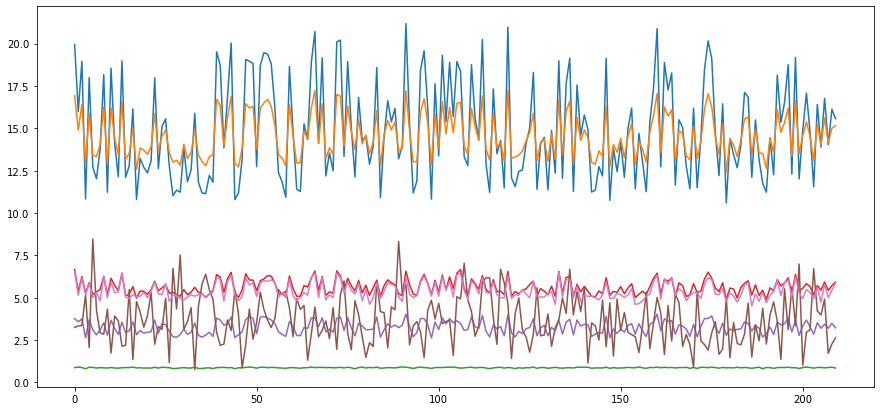

In [57]:
plt.figure(figsize=(15,7))
plt.plot(bank1)
plt.show()

In [58]:
from scipy.stats import zscore
bank_scaled=bank.apply(zscore)
bank_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


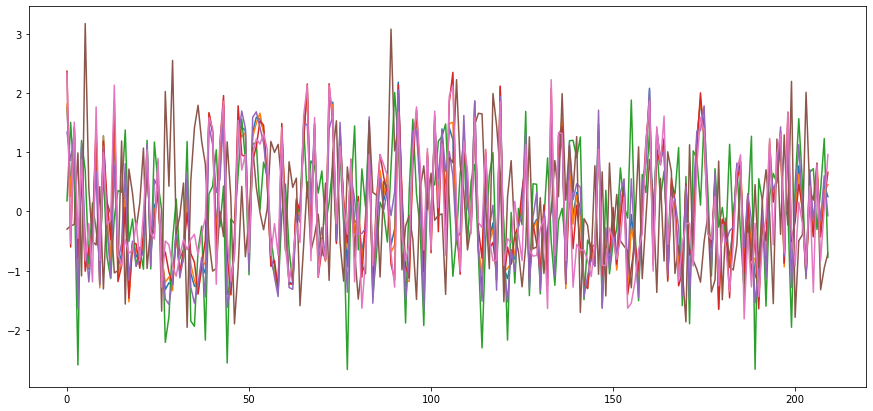

In [59]:
plt.figure(figsize=(15,7))
plt.plot(bank_scaled)
plt.show()

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage


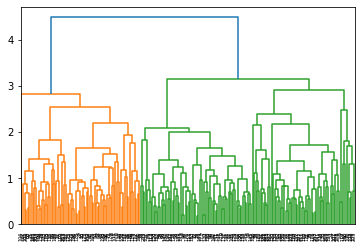

In [61]:
link_method = linkage(bank_scaled, method = 'average')
dend = dendrogram(link_method)

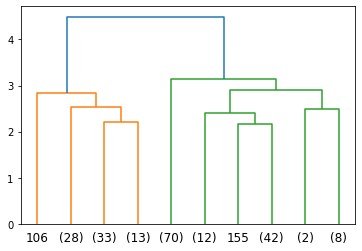

In [62]:
dend = dendrogram(link_method,truncate_mode='lastp',p = 10)

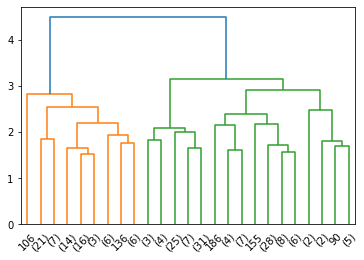

In [63]:
dend = dendrogram(link_method,truncate_mode='lastp',p = 25)

In [64]:
from scipy.cluster.hierarchy import fcluster

In [65]:
cluster= fcluster(link_method, 3, criterion='maxclust')
cluster

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [66]:
bank['cluster']=cluster


In [67]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [68]:
bank.cluster.value_counts().sort_index()

1    75
2    70
3    65
Name: cluster, dtype: int64

In [206]:
aggdata=bank.groupby('cluster').mean()
aggdata['Freq']=bank['cluster'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
cluster,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [70]:
from sklearn.cluster import KMeans 

In [207]:
k_means = KMeans(n_clusters = 3)
k_means.fit(bank_scaled)
k_means.inertia_

430.65897315130064

In [190]:
wss =[] 

In [191]:
    for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(bank_scaled)
        wss.append(KM.inertia_)

In [192]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 326.30618276116064,
 289.46717056412893,
 265.93896955880996,
 240.18462057260552,
 221.82346378147412,
 206.10258570114993]

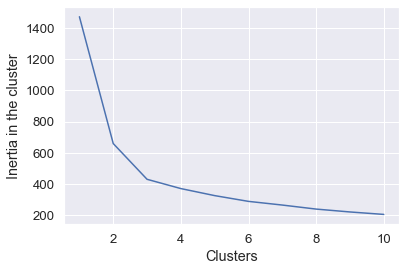

In [193]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [194]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(bank_scaled)
labels_3 = k_means_3.labels_

In [197]:
kmeans3_dataset=bank.copy()

In [198]:
kmeans3_dataset["Clus_kmeans"] = labels_3
kmeans3_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [199]:
silhouette_score(bank_scaled,labels_3)

0.40072705527512986

In [200]:
from sklearn import metrics
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(bank_scaled)
    scores.append(metrics.silhouette_score(bank_scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.32757426605518075,
 0.278365141553204,
 0.28389221057730224,
 0.26934344290163237,
 0.2578633719728751,
 0.2598117260971522,
 0.24034666351680567]

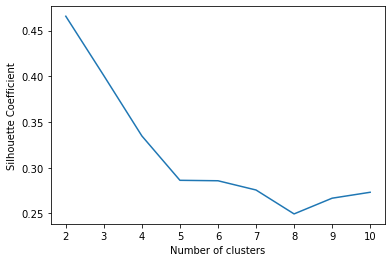

In [82]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [211]:
sil_width = silhouette_samples(bank_scaled,labels_3)

In [213]:
kmeans3_dataset["sil_width"] = sil_width
kmeans3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.362276


In [85]:
kmeans1_dataset=bank.copy()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(bank_scaled)
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
y_kmeans = kmeans.fit_predict(bank_scaled)
cluster = pd.DataFrame(y_kmeans1)

kmeans1_dataset['cluster'] = cluster

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [86]:
def ClusterPercentage(datafr,name):
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)


In [205]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [88]:
cluster_3_T = kmeans_mean_cluster.T
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


## Problem 2: CART-RF-ANN

## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [89]:
insurance = pd.read_csv('insurance_part2_data.csv')

In [90]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [91]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [92]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [93]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [94]:
insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
insurance.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [96]:
insurance.shape

(3000, 10)

In [97]:
for column in insurance[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',insurance[column].nunique())
    print(insurance[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [98]:
dups = insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
insurance[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Univariate Analysis

### AGE

In [99]:
print('Range of values: ', insurance['Age'].max()-insurance['Age'].min())

Range of values:  76


In [100]:
print('Minimum Age: ', insurance['Age'].min())
print('Maximum Age: ',insurance['Age'].max())
print('Mean value: ', insurance['Age'].mean())
print('Median value: ',insurance['Age'].median())
print('Standard deviation: ', insurance['Age'].std())
print('Null values: ',insurance['Age'].isnull().any())

Minimum Age:  8
Maximum Age:  84
Mean value:  38.091
Median value:  36.0
Standard deviation:  10.463518245377944
Null values:  False


In [101]:

Q1=insurance['Age'].quantile(q=0.25)
Q3=insurance['Age'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Age is ', stats.iqr(insurance['Age']))

spending - 1st Quartile (Q1) is:  32.0
spending - 3st Quartile (Q3) is:  42.0
Interquartile range (IQR) of Age is  10.0


In [102]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [103]:
print('Number of outliers in Age upper : ', insurance[insurance['Age']>57.0]['Age'].count())
print('Number of outliers in Age lower : ', insurance[insurance['Age']<17.0]['Age'].count())
print('% of Outlier in Age upper: ',round(insurance[insurance['Age']>57.0]['Age'].count()*100/len(insurance)), '%')
print('% of Outlier in Age lower: ',round(insurance[insurance['Age']<17.0]['Age'].count()*100/len(insurance)), '%')

Number of outliers in Age upper :  198
Number of outliers in Age lower :  6
% of Outlier in Age upper:  7 %
% of Outlier in Age lower:  0 %


Text(0.5, 0, 'Age')

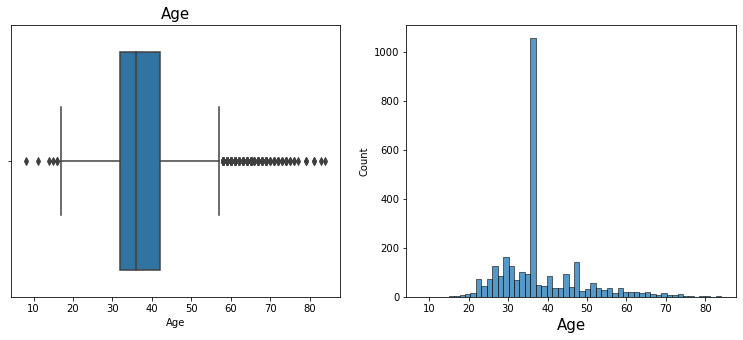

In [104]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Age',data=insurance,ax=ax1)
ax1.set_title('Age', fontsize=15)

sns.histplot(insurance['Age'])
ax2.set_xlabel('Age', fontsize=15)

### COMMISSION

In [105]:
print('Range of values: ', insurance['Commision'].max()-insurance['Commision'].min())

Range of values:  210.21


In [106]:
print('Minimum Commision: ', insurance['Commision'].min())
print('Maximum Commision: ',insurance['Commision'].max())
print('Mean value: ', insurance['Commision'].mean())
print('Median value: ',insurance['Commision'].median())
print('Standard deviation: ', insurance['Commision'].std())
print('Null values: ',insurance['Commision'].isnull().any())

Minimum Commision:  0.0
Maximum Commision:  210.21
Mean value:  14.529203333333266
Median value:  4.63
Standard deviation:  25.48145450662553
Null values:  False


In [107]:
Q1=insurance['Commision'].quantile(q=0.25)
Q3=insurance['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ', Q1)
print('Commision - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Commision is ', stats.iqr(insurance['Commision']))

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Interquartile range (IQR) of Commision is  17.235


In [108]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [109]:
print('Number of outliers in Commision upper : ', insurance[insurance['Commision']>43.0875]['Commision'].count())
print('Number of outliers in Commision lower : ', insurance[insurance['Commision']<-25.8525]['Commision'].count())
print('% of Outlier in Commision upper: ',round(insurance[insurance['Commision']>43.0875]['Commision'].count()*100/len(insurance)), '%')
print('% of Outlier in Commision lower: ',round(insurance[insurance['Commision']<-25.8525]['Commision'].count()*100/len(insurance)), '%')

Number of outliers in Commision upper :  362
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %


Text(0.5, 0, 'Commision')

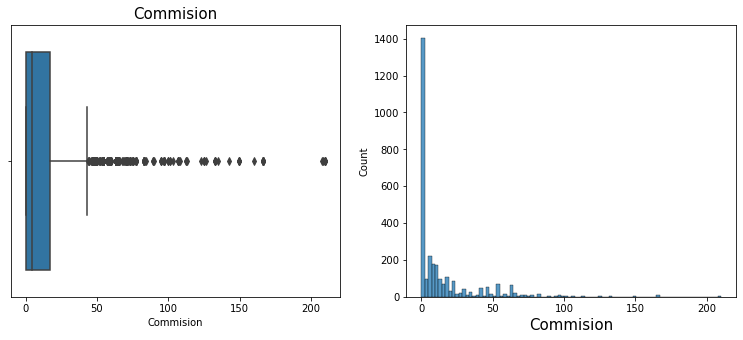

In [110]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Commision',data=insurance,ax=ax1)
ax1.set_title('Commision', fontsize=15)

sns.histplot(insurance['Commision'])
ax2.set_xlabel('Commision', fontsize=15)

### DURATION

In [111]:
print('Range of values: ', insurance['Duration'].max()-insurance['Duration'].min())


Range of values:  4581


In [112]:
print('Minimum Duration: ', insurance['Duration'].min())
print('Maximum Duration: ',insurance['Duration'].max())
print('Mean value: ', insurance['Duration'].mean())
print('Median value: ',insurance['Duration'].median())
print('Standard deviation: ', insurance['Duration'].std())
print('Null values: ',insurance['Duration'].isnull().any())

Minimum Duration:  -1
Maximum Duration:  4580
Mean value:  70.00133333333333
Median value:  26.5
Standard deviation:  134.05331313253495
Null values:  False


In [113]:
Q1=insurance['Duration'].quantile(q=0.25)
Q3=insurance['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ', Q1)
print('Duration - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Duration is ', stats.iqr(insurance['Duration']))

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Interquartile range (IQR) of Duration is  52.0


In [114]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [115]:
print('Number of outliers in Duration upper : ', insurance[insurance['Duration']>141.0]['Duration'].count())
print('Number of outliers in Duration lower : ', insurance[insurance['Duration']<-67.0]['Duration'].count())
print('% of Outlier in Duration upper: ',round(insurance[insurance['Duration']>141.0]['Duration'].count()*100/len(insurance)), '%')
print('% of Outlier in Duration lower: ',round(insurance[insurance['Duration']<-67.0]['Duration'].count()*100/len(insurance)), '%')

Number of outliers in Duration upper :  382
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %


Text(0.5, 0, 'Duration')

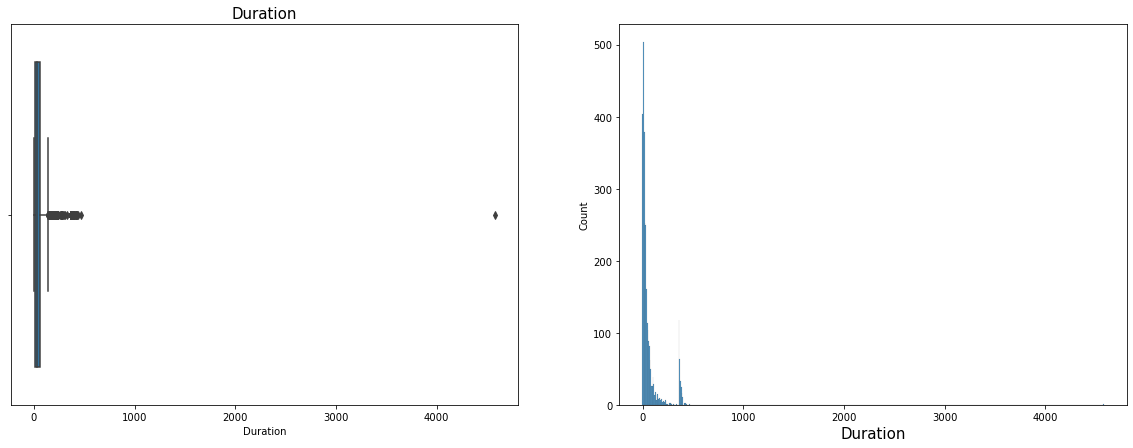

In [116]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7))

sns.boxplot(x='Duration',data=insurance,ax=ax1)
ax1.set_title('Duration', fontsize=15)

sns.histplot(insurance['Duration'])
ax2.set_xlabel('Duration', fontsize=15)

### SALES

In [117]:
print('Range of values: ', insurance['Sales'].max()-insurance['Sales'].min())

Range of values:  539.0


In [118]:
print('Minimum Sales: ', insurance['Sales'].min())
print('Maximum Sales: ',insurance['Sales'].max())
print('Mean value: ', insurance['Sales'].mean())
print('Median value: ',insurance['Sales'].median())
print('Standard deviation: ', insurance['Sales'].std())
print('Null values: ',insurance['Sales'].isnull().any())

Minimum Sales:  0.0
Maximum Sales:  539.0
Mean value:  60.24991333333344
Median value:  33.0
Standard deviation:  70.73395353143047
Null values:  False


In [119]:
Q1=insurance['Sales'].quantile(q=0.25)
Q3=insurance['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ', Q1)
print('Sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Sales is ', stats.iqr(insurance['Sales']))

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Interquartile range (IQR) of Sales is  49.0


In [120]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


In [121]:
print('Number of outliers in Sales upper : ', insurance[insurance['Sales']>142.5]['Sales'].count())
print('Number of outliers in Sales lower : ', insurance[insurance['Sales']<-53.5]['Sales'].count())
print('% of Outlier in Sales upper: ',round(insurance[insurance['Sales']>142.5]['Sales'].count()*100/len(insurance)), '%')
print('% of Outlier in Sales lower: ',round(insurance[insurance['Sales']<-53.5]['Sales'].count()*100/len(insurance)), '%')

Number of outliers in Sales upper :  353
Number of outliers in Sales lower :  0
% of Outlier in Sales upper:  12 %
% of Outlier in Sales lower:  0 %


Text(0.5, 0, 'Sales')

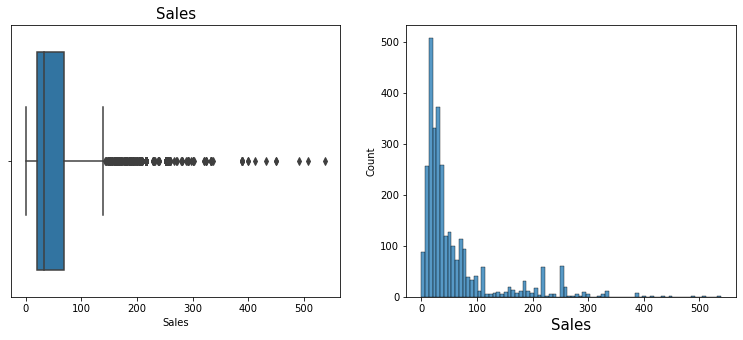

In [122]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Sales',data=insurance,ax=ax1)
ax1.set_title('Sales', fontsize=15)

sns.histplot(insurance['Sales'])
ax2.set_xlabel('Sales', fontsize=15)

### TYPE

Text(0.5, 0, 'Type')

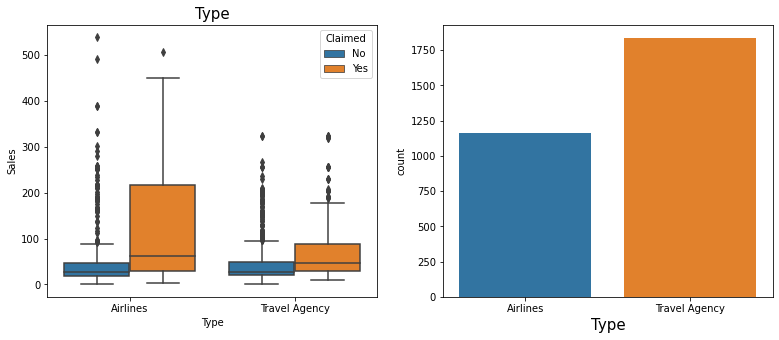

In [123]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Type',y='Sales',data=insurance,hue='Claimed',ax=ax1)
ax1.set_title('Type', fontsize=15)

sns.countplot(x='Type',data=insurance)
ax2.set_xlabel('Type', fontsize=15)

### CHANNEL

Text(0.5, 0, 'Channel')

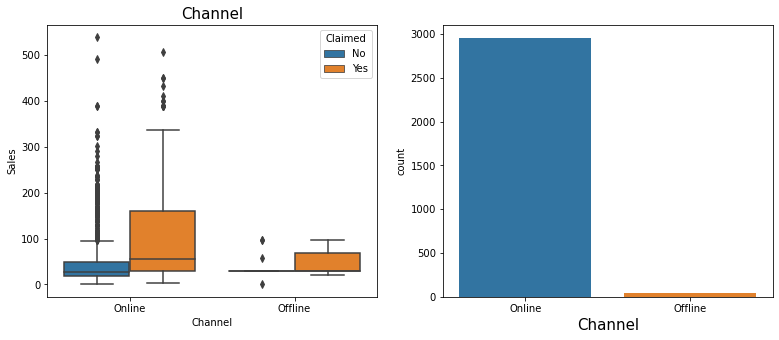

In [124]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Channel',y='Sales',data=insurance,hue='Claimed',ax=ax1)
ax1.set_title('Channel', fontsize=15)

sns.countplot(x='Channel',data=insurance)
ax2.set_xlabel('Channel', fontsize=15)

### AGENCY_CODE

Text(0.5, 0, 'Agency_Code')

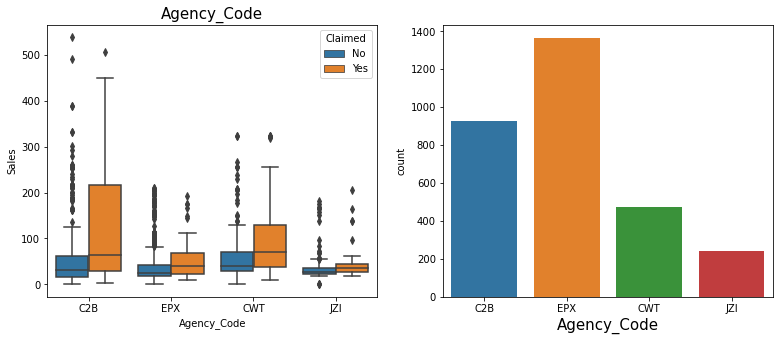

In [125]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Agency_Code',y='Sales',data=insurance,hue='Claimed',ax=ax1)
ax1.set_title('Agency_Code', fontsize=15)

sns.countplot(x='Agency_Code',data=insurance)
ax2.set_xlabel('Agency_Code', fontsize=15)

### DESTINATION

Text(0.5, 0, 'Destination')

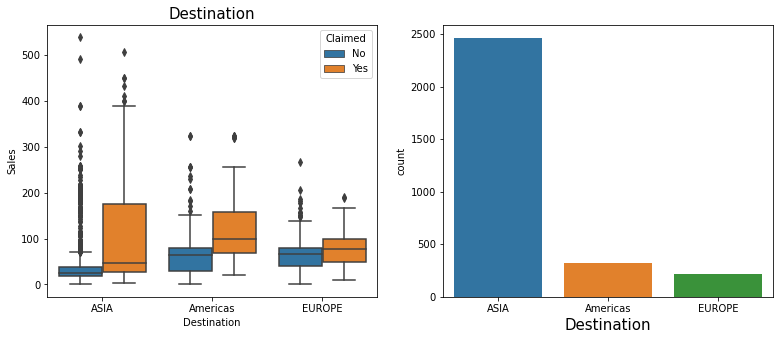

In [126]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Destination',y='Sales',data=insurance,hue='Claimed',ax=ax1)
ax1.set_title('Destination', fontsize=15)

sns.countplot(x='Destination',data=insurance)
ax2.set_xlabel('Destination', fontsize=15)

### PRODUCT NAME

Text(0.5, 0, 'Product Name')

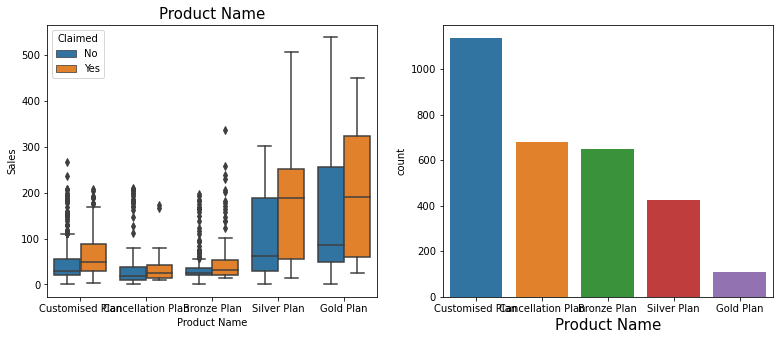

In [127]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='Product Name',y='Sales',data=insurance,hue='Claimed',ax=ax1)
ax1.set_title('Product Name', fontsize=15)

sns.countplot(x='Product Name',data=insurance)
ax2.set_xlabel('Product Name', fontsize=15)

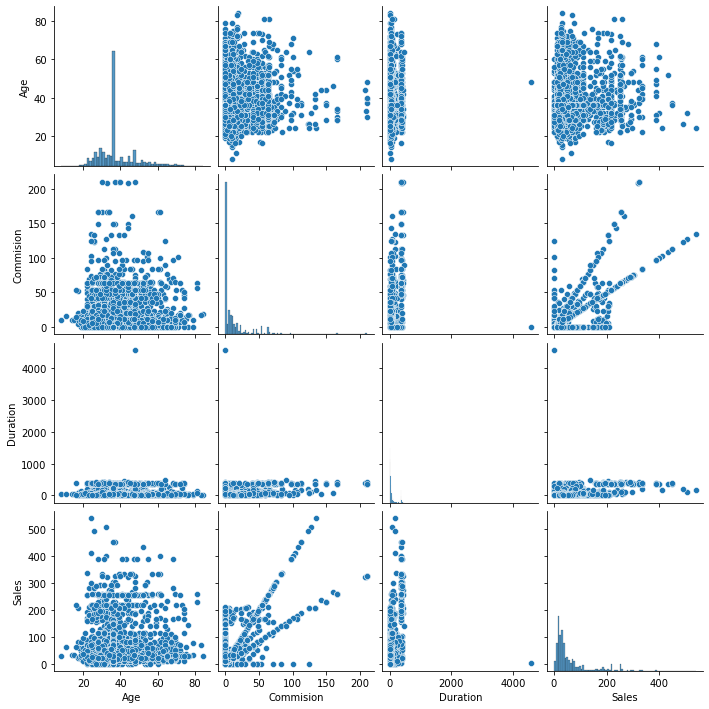

In [128]:
sns.pairplot(insurance[['Age', 'Commision','Duration', 'Sales']])

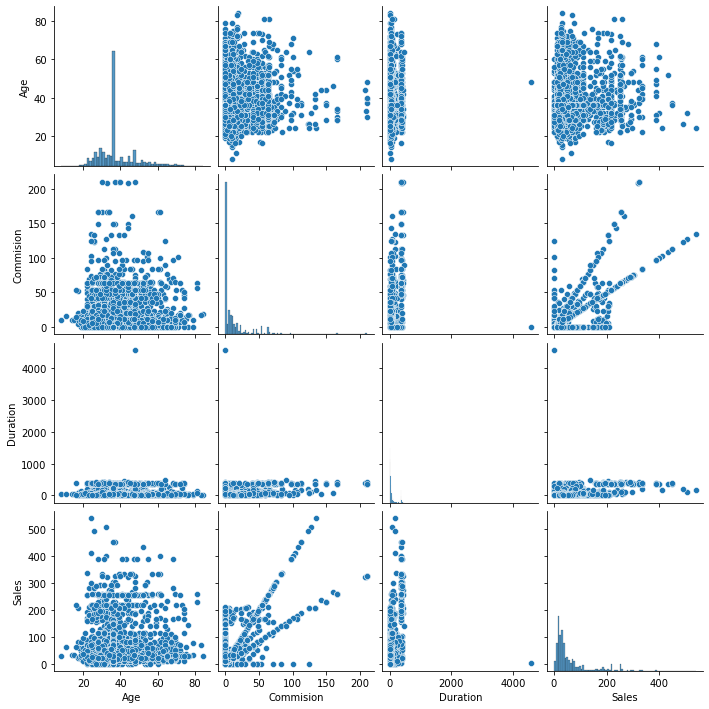

In [129]:
sns.pairplot(insurance)

<AxesSubplot:>

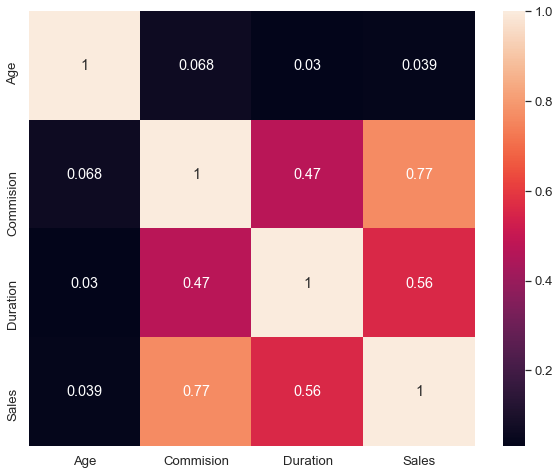

In [130]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(insurance.corr(), annot=True)

In [131]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance[feature].unique()))
        print(pd.Categorical(insurance[feature].unique()).codes)
        insurance[feature] = pd.Categorical(insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [133]:
X = insurance.drop("Claimed", axis=1)

y = insurance.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


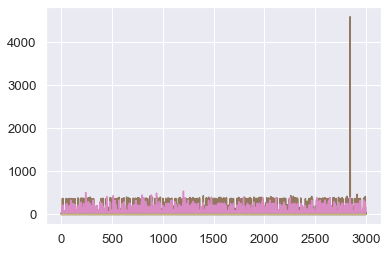

In [134]:
plt.plot(X)
plt.show()

In [135]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


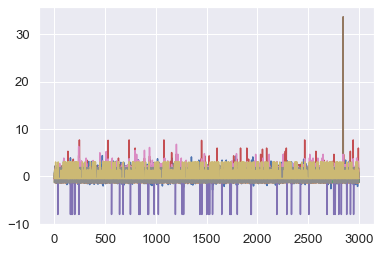

In [136]:
plt.plot(X_scaled)
plt.show()

### Decision Tree Classifier

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [138]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [141]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [142]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [143]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.674494
Sales         0.222345
Product Name  0.092149
Commision     0.008008
Duration      0.003005
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [144]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [145]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.979452,0.020548
2,0.921171,0.078829
3,0.656751,0.343249
4,0.921171,0.078829


### Neural Networks

In [146]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,3000,4000],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [147]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [148]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [149]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


### Random Forest

In [150]:
param_grid_rfcl = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100], 
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [151]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 100}


RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       min_samples_split=100, random_state=1)

In [216]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.364408
Product Name  0.206559
Sales         0.159045
Commision     0.110955
Type          0.075465
Duration      0.050107
Age           0.023102
Destination   0.005485
Channel       0.004873


In [152]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [153]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.776949,0.223051
1,0.965672,0.034328
2,0.916237,0.083763
3,0.690907,0.309093
4,0.895991,0.104009


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

AUC: 0.812


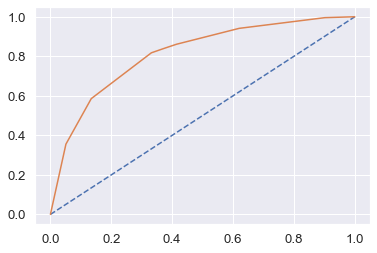

In [154]:
probs_cart = best_grid_dtcl.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.800


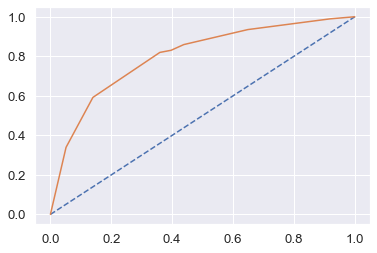

In [155]:
probs_cart = best_grid_dtcl.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [156]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]])

In [157]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [158]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.59
cart_train_f1  0.62


In [159]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]])

In [160]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7795238095238095

In [162]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]])

In [163]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7777777777777778

In [164]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [165]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.59
cart_test_f1  0.62


### Random Forest

In [166]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1289,  164],
       [ 246,  401]])

In [167]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8047619047619048

In [168]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.71      0.62      0.66       647

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [169]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.62
rf_train_f1  0.66


Area under Curve is 0.8448347021724492


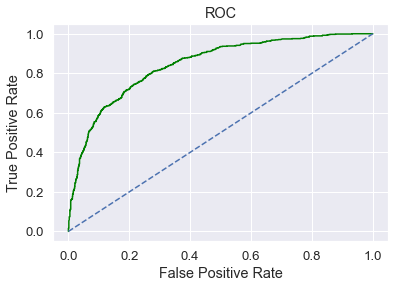

In [170]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [171]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[544,  79],
       [116, 161]])

In [172]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7833333333333333

In [173]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       623
           1       0.67      0.58      0.62       277

    accuracy                           0.78       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.78      0.78      0.78       900



In [174]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.58
rf_test_f1  0.62


Area under Curve is 0.8183762045766669


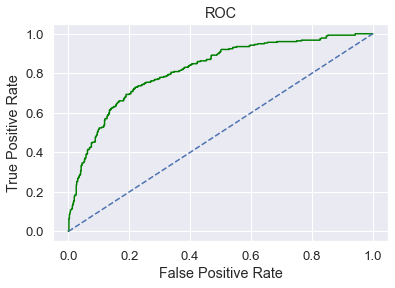

In [175]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

### Neural Networks

In [176]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1298,  155],
       [ 315,  332]])

In [177]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [178]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [179]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.68
nn_train_recall  0.51
nn_train_f1  0.59


Area under Curve is 0.8166831721609928


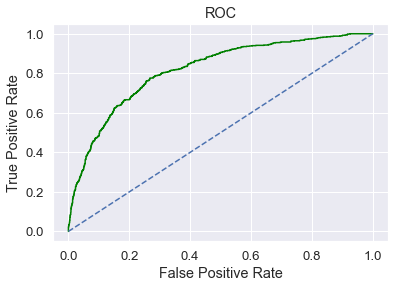

In [180]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [181]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[553,  70],
       [138, 139]])

In [182]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [183]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



In [184]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.5
nn_test_f1  0.57


Area under Curve is 0.8044225275393896


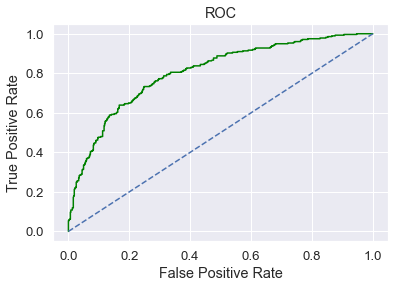

In [185]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

### 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

In [186]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.80,0.78,0.78,0.77
AUC,0.81,0.80,0.84,0.82,0.82,0.80
Recall,0.59,0.59,0.62,0.58,0.51,0.50
Precision,0.66,0.65,0.71,0.67,0.68,0.67
F1 Score,0.62,0.62,0.66,0.62,0.59,0.57


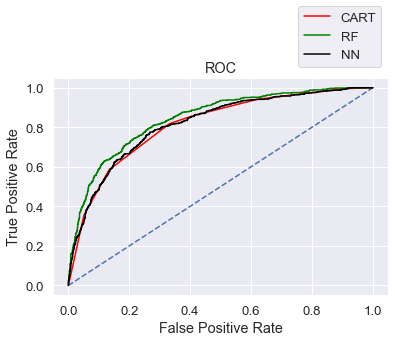

In [187]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

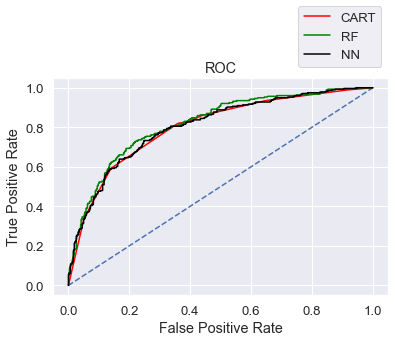

In [188]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')